In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as Fun
import matplotlib.pyplot as plt


d:\anaconda\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df=pd.read_excel('sales_data.xlsx')

In [4]:
df['weather']=df['weather'].apply(lambda x :0  if x=='bad' else 1)
df['weekend']=df['weekend'].apply(lambda x : 0 if x=='no' else 1)
df['on sale']=df['on sale'].apply(lambda x : 0 if x=='no'else 1)
df['sale']=df['sale'].apply(lambda x :0 if x =='low'else 1)

In [5]:
class BPNetModel(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(BPNetModel, self).__init__()
        self.hiddden=torch.nn.Linear(n_feature,n_hidden)
        self.out=torch.nn.Linear(n_hidden,n_output)
    def forward(self,x):
        x=Fun.relu(self.hiddden(x)) 
        out=Fun.softmax(self.out(x),dim=1) 
        return out


In [6]:

net=BPNetModel(n_feature=3,n_hidden=5,n_output=2) #
optimizer=torch.optim.Adam(net.parameters(),lr=0.02) 
loss_fun=torch.nn.CrossEntropyLoss()


In [7]:
x_train=torch.FloatTensor(np.array(df.iloc[:,1:4]))
y_train=torch.LongTensor(df.iloc[:,4])

In [8]:
epochs=20
loss_steps=np.zeros(epochs) 
accuracy_steps=np.zeros(epochs)
for epoch in range(epochs):
    y_pred=net(x_train) 
    loss=loss_fun(y_pred,y_train)
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 
    loss_steps[epoch]=loss.item()
    running_loss = loss.item()
    print(f"第{epoch}次训练,loss={running_loss}".format(epoch,running_loss))
    with torch.no_grad(): 
        y_pred=net(x_train)
        correct=(torch.argmax(y_pred,dim=1)==y_train).type(torch.FloatTensor)
        accuracy_steps[epoch]=correct.mean()
        print("预测准确率", accuracy_steps[epoch])


第0次训练,loss=0.6978004574775696
预测准确率 0.529411792755127
第1次训练,loss=0.6962136030197144
预测准确率 0.529411792755127
第2次训练,loss=0.6947998404502869
预测准确率 0.529411792755127
第3次训练,loss=0.693461000919342
预测准确率 0.529411792755127
第4次训练,loss=0.692176103591919
预测准确率 0.529411792755127
第5次训练,loss=0.6909152865409851
预测准确率 0.529411792755127
第6次训练,loss=0.6896519660949707
预测准确率 0.529411792755127
第7次训练,loss=0.68848717212677
预测准确率 0.529411792755127
第8次训练,loss=0.6872907280921936
预测准确率 0.529411792755127
第9次训练,loss=0.6860656142234802
预测准确率 0.5882353186607361
第10次训练,loss=0.6848207712173462
预测准确率 0.5882353186607361
第11次训练,loss=0.6835591793060303
预测准确率 0.5882353186607361
第12次训练,loss=0.6822757720947266
预测准确率 0.5882353186607361
第13次训练,loss=0.6809594035148621
预测准确率 0.5882353186607361
第14次训练,loss=0.6796005368232727
预测准确率 0.5882353186607361
第15次训练,loss=0.6781934499740601
预测准确率 0.5882353186607361
第16次训练,loss=0.6767482757568359
预测准确率 0.5882353186607361
第17次训练,loss=0.6752457022666931
预测准确率 0.5882353186607361
第18次训练,loss=0.6

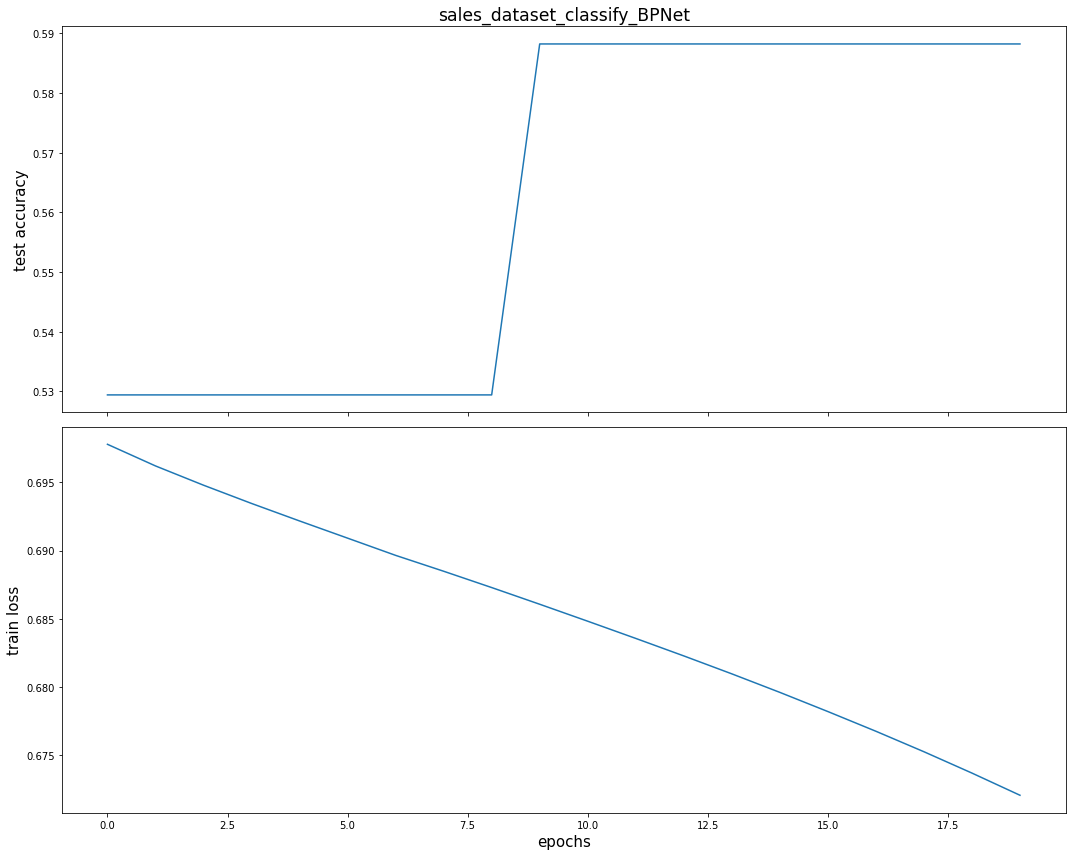

In [11]:
fig_name="sales_dataset_classify_BPNet"
fontsize=15
fig,(ax1,ax2)=plt.subplots(2,figsize=(15,12),sharex=True)
ax1.plot(accuracy_steps)
ax1.set_ylabel("test accuracy",fontsize=fontsize)
ax1.set_title(fig_name,fontsize="xx-large")
ax2.plot(loss_steps)
ax2.set_ylabel("train loss",fontsize=fontsize)
ax2.set_xlabel("epochs",fontsize=fontsize)
plt.tight_layout()
